In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
sales = pd.read_csv("SalesData.csv")

In [5]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### 1. Compare Sales by region for 2016 with 2015 using bar chart


In [17]:
sales1 = sales.groupby(['Region'])[['Sales2015','Sales2016']].aggregate(np.sum)

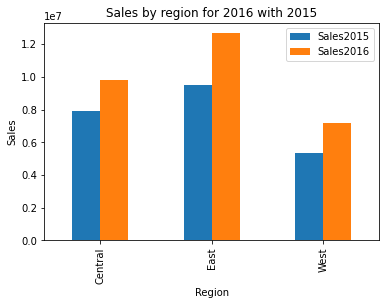

We can conclude that sales in 2016 is more as compared to sales in 2015 in all regions. East region has contributed the maximum.


In [20]:
sales1.plot(kind = 'bar')
plt.ylabel('Sales')
plt.title("Sales by region for 2016 with 2015")
plt.show()

print("We can conclude that sales in 2016 is more as compared to sales in 2015 in all regions. East region has contributed the maximum.")

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<AxesSubplot:ylabel='Sales2016'>], dtype=object)

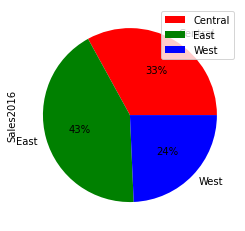

In [21]:
sales2 = sales.groupby(['Region'])[['Sales2016']].aggregate(np.sum)

sales2.plot(kind='pie', 
            labels=['Central','East','West'], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

We can conclude that East region and High tier in 2016 have contributed the maximum. Also sales in 2015 and sales in 2016 both is maximum in East region and High tier


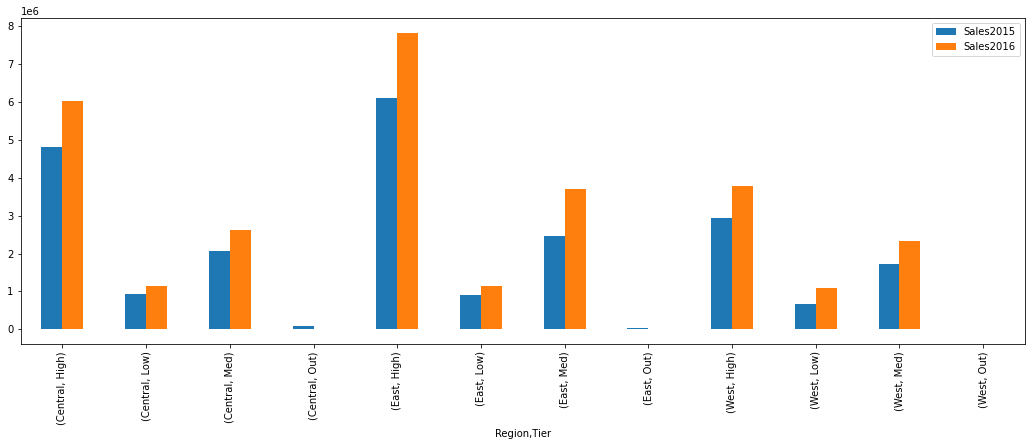

In [23]:
sales3 = sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].aggregate(np.sum)

sales3graph=sales3.plot.bar(figsize=(18,6))

print("We can conclude that East region and High tier in 2016 have contributed the maximum. Also sales in 2015 and sales in 2016 both is maximum in East region and High tier")

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [24]:
Sales_state = sales.groupby(by=['Region','State'])[['Sales2015','Sales2016']].aggregate(np.sum)

In [26]:
sales_east = Sales_state.loc["East"]

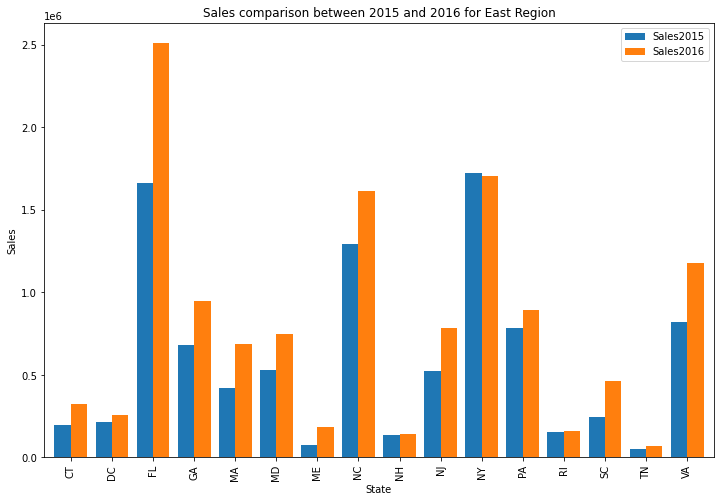

NY state registered a decline in sales in 2016 as compared to 2015


In [29]:
sales_east.plot(kind ='bar',figsize=(12,8),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 for East Region")
plt.show()


print("NY state registered a decline in sales in 2016 as compared to 2015")

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [30]:
Sales_tier = sales.groupby(by=['Tier','Division'])[['Sales2015','Sales2016']].aggregate(np.sum)

In [31]:
sales_tie = Sales_tier.loc["High"]

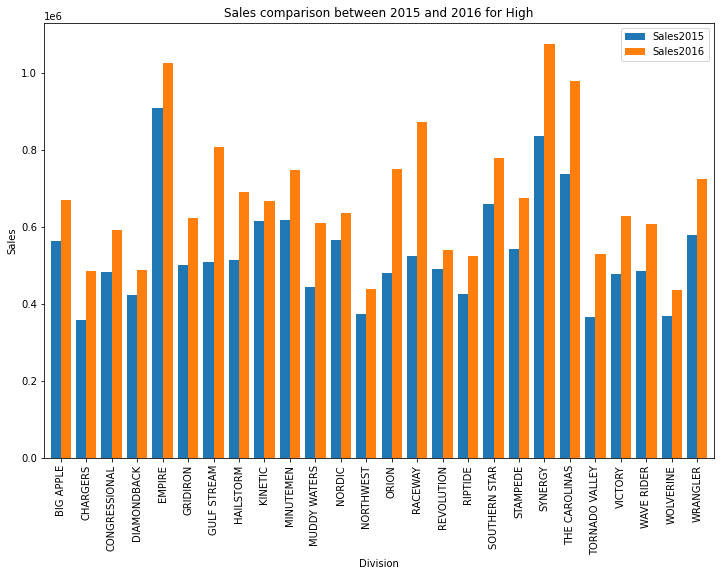

In [34]:
sales_tie.plot(kind ='bar',figsize=(12,8),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 for High")
plt.show()


In [35]:
print("No division show decline in number of units sold in 2016 compared to 2015")

No division show decline in number of units sold in 2016 compared to 2015


### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


##### Unable to use np.where so used for loop instead

In [77]:
month =sales["Month"]


quarter = []
for x in month :
    if x in ["Jan","Feb","Mar"]:
        quarter.append("Q1")
    elif x in ["Apr","May","Jun"]:
        quarter.append("Q2")
    elif x in ["Jul","Aug","Sep"]:
        quarter.append("Q3")
    else:
        quarter.append("Q4")
        
        
sales["Qtr"]= pd.Series(quarter)

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


In [80]:
qtr_sales = sales.groupby("Qtr")[["Sales2015","Sales2016"]].aggregate(np.sum)

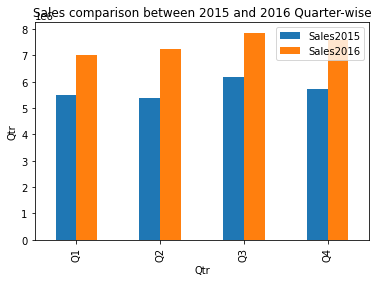

In [82]:
qtr_sales.plot(kind='bar')
plt.ylabel("Qtr")
plt.title("Sales comparison between 2015 and 2016 Quarter-wise")
plt.show()


### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [93]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(['Qtr','Tier'])[['Sales2016']].aggregate(np.sum)
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack()
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0


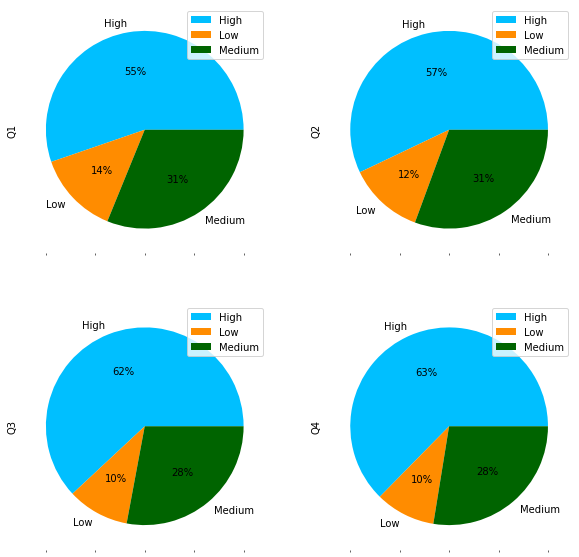

In [94]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()